# Lab 3a: Graphs I

Lab associated with Module 3a: Graphs I

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

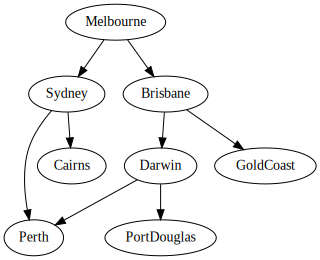

In [4]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [6]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [7]:
G_y = Graph()
for i in range(10):
    G_y.addVertex( Node(i) )

In [8]:
V_y = G_y.vertices
for i in range(9):
    G_y.addDiEdge( V_y[i], V_y[i+1] )

In [9]:
print(G_y)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [10]:
G_y = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G_y.addVertex( Node(i) )

In [11]:
V_y = G_y.vertices

In [12]:
for i in range(len(V_y)):
    print(i, V_y[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [13]:
#dot.edge('Melbourne', 'Sydney')
G_y.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G_y.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G_y.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G_y.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G_y.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G_y.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G_y.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G_y.addDiEdge( V[4], V[6] )

NameError: name 'V' is not defined

In [ ]:
print(G_y)

Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [64]:
'''
def DFS(root):
    
    if root == Null:
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)
'''

'\ndef DFS(root):\n    \n    if root == Null:\n        return\n\n    root.visited = True\n\n    for n in root.neighbours:\n        if n.visited == False:\n            DFS(n)\n'

In [65]:
def DFS_helper(w):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            
            DFS_helper(v)
    
    print(w)
    w.status = "done"
    
        
def DFS(w, G):
    
    for v in G.vertices:
        
        v.status = "unvisited"
        
    return DFS_helper(w)

In [66]:
# Let us do the DFS from Melbourne
w_y = G_y.vertices[0]

DFS(w_y, G_y)

Melbourne


***

### <font color='red'> Section 3: Modify above code to do in-order, pre-order and post-order traversal. I know it is trivial, but I would like you to practise your understanding of the data structure and the algorithm. </font>

In [88]:
### TODO ###
### Good Luck ###

def inOrder_tree(w):
    w.status = "inprogress"
    
    # For this case only the 2 indecies are considered as this operation assumes a binary tree
    verts = w.getOutNeighbors()
    verts_len = len(verts)
    if verts_len:
        if verts[0].status == "unvisited":
            inOrder_tree(verts[0])
        print(w)
        for v in verts[1:]:
            if v.status == "unvisited":
                inOrder_tree(v)
    else:
        print(w)
    # --
    w.status = "done"
    return w
# --


def DFS_inOrder_tree(w,G):
    for v in G.vertices:
        v.status = "unvisited"
    
    return inOrder_tree(w)
# --

def preOrder_tree(w):
    w.status = "inprogress"
    
    print(w)
    
    for v in w.getOutNeighbors():
        if v.status == "unvisited":
            preOrder_tree(v)
    
    w.status = "done"
# --


def DFS_preOrder_tree(w,G):
    for v in G.vertices:
        v.status = "unvisited"
    
    return preOrder_tree(w)
# --


def postOrder_tree(w):
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        if v.status == "unvisited":
            postOrder_tree(v)
    # --
    
    print(w)
    
    w.status = "done"
# --


def DFS_postOrder_tree(w,G):
    for v in G.vertices:
        v.status = "unvisited"
    
    return postOrder_tree(w)
# --


Graph with:
	 Vertices:
	1,2,3,4,5,6,7,8,
	 Edges:
	(1,2) (1,3) (2,4) (2,8) (3,5) (3,6) (5,7) 



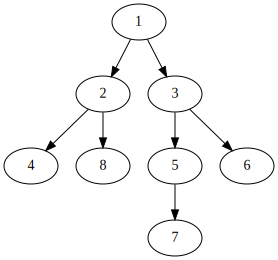


 -- inOrder -- 

4
2
8
1
7
5
3
6

 -- preOrder -- 

1
2
4
8
3
5
7
6

 -- postOrder -- 

4
8
2
7
5
6
3
1


 ---- 




In [96]:


def display_graph(G):
    V = G.vertices
    dot = Digraph()
    print(G)
    for a,b in G.getDirEdges():
        dot.edge(str(a),str(b))
    # --
    return dot
# --


G = Graph()
for i in ['1', '2', '3', '4', '5', '6', '7', '8']:
    G.addVertex( Node(i) )
# --

V = G.vertices

#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )


#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )



w = G.vertices[0]

dot = display_graph(G)
display(dot)

print('\n -- inOrder -- \n')
DFS_inOrder_tree(w,G)

print('\n -- preOrder -- \n')
DFS_preOrder_tree(w,G)

print('\n -- postOrder -- \n')
DFS_postOrder_tree(w,G)

print('\n\n ---- \n\n')


***

### <font color='red'> Section 4: Implement Topological Sorting, as we discussed in the lecture. Do not forget to test your program on the dependency graph given in the lecture. </font>

In [103]:
#### TODO ####
### Good Luck ###


def top_sort(w, sorted_list):
    
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        if v.status == "unvisited":
            top_sort(v, sorted_list)
    
    w.status = "done"
    
    if w:
        sorted_list.append(w)
# --
    
        
def DFS_top_sort(w, G):
    sorted_list = []
    for v in G.vertices:
        v.status = "unvisited"
    # --
    top_sort(w, sorted_list)
    
    [print(x) for x in sorted_list]
    
    return sorted_list
# --







 -- topSort -- 

b
d
c
a


 ---- 


Graph with:
	 Vertices:
	a,b,c,d,
	 Edges:
	(a,c) (c,b) (c,d) (d,b) 



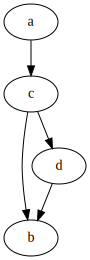


 -- topSort -- 

tar
multiarch-support
libselinux1
libbz2
coreutils
dpkg


 ---- 


Graph with:
	 Vertices:
	tar,libbz2,coreutils,dpkg,libselinux1,multiarch-support,
	 Edges:
	(libbz2,libselinux1) (coreutils,libbz2) (coreutils,libselinux1) (dpkg,tar) (dpkg,libbz2) (dpkg,coreutils) (dpkg,multiarch-support) (libselinux1,multiarch-support) 



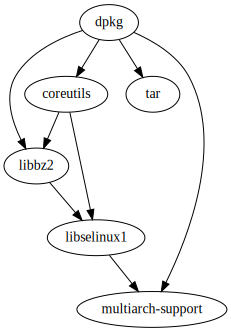

In [107]:

# Create module example top graph

G = Graph()
for i in ['a', 'b', 'c', 'd']:
    G.addVertex( Node(i) )
# --

V = G.vertices

G.addDiEdge( V[0], V[2] )
G.addDiEdge( V[2], V[1] )
G.addDiEdge( V[2], V[3] )
G.addDiEdge( V[3], V[1] )

w = V[0]



print('\n -- topSort -- \n')

sorted_list = DFS_top_sort(w,G)


print('\n\n ---- \n\n')
dot = display_graph(G)
display(dot)



# Question 4 - Design an algorithem for topological sorting example

G = Graph()
for i in ['tar','libbz2', 'coreutils', 'dpkg', 'libselinux1', 'multiarch-support']:
    G.addVertex( Node(i) )
# --

V = G.vertices


G.addDiEdge( V[1], V[4] )

G.addDiEdge( V[2], V[1] )
G.addDiEdge( V[2], V[4] )

G.addDiEdge( V[3], V[0] )
G.addDiEdge( V[3], V[1] )
G.addDiEdge( V[3], V[2] )
G.addDiEdge( V[3], V[5] )

G.addDiEdge( V[4], V[5] )




w = V[3]



print('\n -- topSort -- \n')

sorted_list = DFS_top_sort(w,G)


print('\n\n ---- \n\n')
dot = display_graph(G)
display(dot)

***

### Section 5: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph

In [ ]:
def BFS(root):

    visited = [False] * (num_nodes_in_graph)

    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.adjacent:
            
            if visited[n] == False:
                
                visited[n] = True
                queue.append(n)
                

In [119]:
def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

In [144]:
G = Graph()
for i in ['1', '2', '3', '4', '5', '6', '7', '8']:
    G.addVertex( Node(i) )
# --

V = G.vertices

#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )


#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )



w = G.vertices[0]


 ---- 

1
2
3
4
8
5
6
7

 ---- 

Graph with:
	 Vertices:
	1,2,3,4,5,6,7,8,
	 Edges:
	(1,2) (1,3) (2,4) (2,8) (3,5) (3,6) (5,7) 



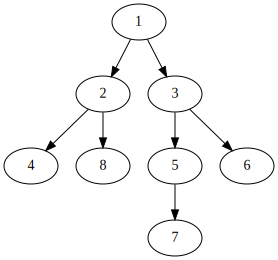

In [145]:
# Let us do the BFS from dpkg

print('\n ---- \n')

w = G.vertices[0]
BFS(w, G)

#print('\n\n ---- \n\n')
print('\n ---- \n')
dot = display_graph(G)
display(dot)

***

### <font color='red'> Section 6: Write an algorithm (and code) to determine the distance of a node from a specified node to all other nodes. Note, you are expected to use BFS. Distance will be specified in terms of how how many hops away a node is. </font>

In [163]:
#### TODO ####
### Good Luck ###

def BFS_depth(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            #print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)
    # --
    for idx in range(len(Ls)):
        j = Ls[idx]
        if len(j) > 0:
            print("Dist: {}, {}".format(idx,[str(k) for k in j]))
# --

BFS_depth(w, G)



Dist: 0, ['1']
Dist: 1, ['2', '3']
Dist: 2, ['4', '8', '5', '6']
Dist: 3, ['7']


***

In [178]:


def print_ls(Ls):
    for idx in range(len(Ls)):
        j = Ls[idx]
        if len(j) > 0:
            print("Dist: {}, {}".format(idx,[str(k) for k in j]))
# --




### <font color='red'> Section 7: Bidirectional search is used to find the shortest path between a source and a destination. It operates by essentially running two simultaneous breadth-first searches one from each node. When their searches collide, we have a match. Design an algorithm for bi-directional search, and then code it in the following cell. </font>

7
5
3
1

 ---- 

1
2
3
4
8
5
6
7

 -- BFS_bi_directional -- 

1
8
Match:  2
Dist: 0, ['1']
Dist: 1, ['2', '3']
Dist: 0, ['8']
Dist: 1, ['2']

 ---- 

Graph with:
	 Vertices:
	1,2,3,4,5,6,7,8,
	 Edges:
	(1,2) (1,3) (2,4) (2,8) (3,5) (3,6) (5,7) 



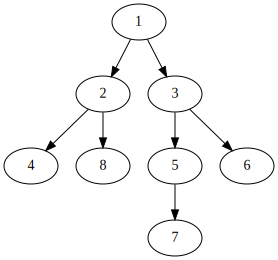

In [185]:
#### TODO ####
### Good Luck ###


def BFS(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)
# --

def BFS_in(w, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ls[0] = [w]
    w.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getInNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)
# --


def BFS_bi_directional(s, d, G):
    
    for v in G.vertices:
        v.status = "unvisited"
        
    n = len(G.vertices)
    
    Ls = [ [] for i in range(n) ]
    
    Ld = [ [] for i in range(n) ]
    
    Ls[0] = [s]
    Ld[0] = [d]
    
    s.status = "visited"
    d.status = "visited"
    
    for i in range(n):
        for u in Ls[i]:
            
            print(u)
            
            for v in u.getOutNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited3"
                    Ls[i + 1].append(v)
                elif v.status == "visited2":
                    print('Match: ', v)
                    Ls[i + 1].append(v)
                    print_ls(Ls)
                    print_ls(Ld)
                    return
        # --
        for u in Ld[i]:
            
            print(u)
            
            for v in u.getInNeighbors():
                
                if v.status == "unvisited":
                    v.status = "visited2"
                    Ld[i + 1].append(v)
                elif v.status == "visited3":
                    print('Match: ', v)
                    Ld[i + 1].append(v)
                    print_ls(Ls)
                    print_ls(Ld)
                    return
    # --
# --

w = G.vertices[6]
BFS_in(w, G)

print('\n ---- \n')

w = G.vertices[0]
BFS(w, G)

print('\n -- BFS_bi_directional -- \n')

s = G.vertices[0]
d = G.vertices[7]
BFS_bi_directional(s, d, G)

print('\n ---- \n')
dot = display_graph(G)
display(dot)



***

### <font color='red'> Section 8: Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm. </font>

In [ ]:
#### TODO ####
### Good Luck ###









***

### Section 9: Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [ ]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [ ]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [ ]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [ ]:
def SCC(G, verbose=False):
    
    ordering = []
    
    for v in G.vertices:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in G.vertices:
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, ordering, verbose)
        currentTime += 1
    
    # now reverse all the edges
    E = G.getDirEdges()
    for x,y in E:
        G.reverseEdge(x,y)
   
    # and do it again, but this tim in the order "ordering"
    SCCs = []
    for v in ordering:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in ordering:
        visited = [] 
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, visited, verbose)
            SCCs.append(visited[:])
    
    return SCCs

Let us look at the example that we did in the lecture:

In [ ]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)

In [ ]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

Play around with above SCC Code -- Try applying it on the Australian cities data we had before.

***


 -- Adj-Matrix -- 

[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 1 0 0]
 [1 1 0 1 0]]

 -- Adj-Matrix^2 -- 

[[0 0 0 1 0]
 [0 0 1 0 0]
 [1 1 0 2 0]
 [0 1 0 0 1]
 [0 1 1 1 0]]


 ---- 


Graph with:
	 Vertices:
	a,b,c,d,e,
	 Edges:
	(a,b) (b,d) (c,b) (c,e) (d,c) (e,a) (e,b) (e,d) 



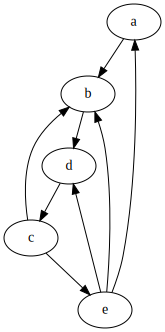

In [118]:
# Incresed graph adjacency
grof = ['a','b','c','d','e']
    
matrix_test = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0],
    [1, 1, 0, 1, 0]
]

matrix_test = np.array(matrix_test)

#matrix_test_2 = np.array(matrix_test)

matrix_test_2 = np.linalg.matrix_power(matrix_test, 2)


G = Graph()
for i in grof:
    G.addVertex( Node(i) )
# --
V = G.vertices



for j in range(len(matrix_test)):
    for k in range(len(matrix_test[j])):
        if matrix_test[j][k] == 1:
            G.addDiEdge( V[j], V[k] )
# --

print('\n -- Adj-Matrix -- \n')

print(matrix_test)

print('\n -- Adj-Matrix^2 -- \n')

print(matrix_test_2)

print('\n\n ---- \n\n')
dot = display_graph(G)
display(dot)
